<a href="https://colab.research.google.com/github/yogyata-04/Handwritten-Emoji-Letter-Captcha-Detection/blob/main/Model_training_emoji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tensorflow.keras import regularizers
from keras import layers
from keras import models
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/mosaic_ps1/emoji_dataset3.csv')

In [7]:
x = df.drop(columns = ['TARGET'])
x=np.array(x)
x[x>150] = 255
x[x<=150] = 0
y = df['TARGET']
y.replace(3, 0, inplace=True)
y.replace(7, 1, inplace=True)
y.replace(9, 2, inplace=True)
y.replace(15, 3, inplace=True)
y.replace(17, 4, inplace=True)
y.replace(21, 5, inplace=True)
y.replace(22, 6, inplace=True)
x = np.array(x).astype(float)
y = np.array(y).astype(float)
x = x.reshape(x.shape[0] , 28 , 28 , 1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x/255.0, y, test_size=0.20, random_state=42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 12, 12, 12)        312       
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 12)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 150)              

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
history = model.fit(x_train,y_train,epochs = 50,validation_data=(x_val, y_val))


In [9]:
model.evaluate(x_test , y_test)

58/58 [==============================] - 1s 7ms/step - loss: 0.0213 - accuracy: 0.9957


[0.021270934492349625, 0.9956545233726501]

In [ ]:
model.save('/content/drive/MyDrive/mosaic/model_emoji_dataset_final.h5')

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print("Enter the path of the image")
a = input()

Enter the path of the image
check.jpg


In [ ]:
#read and thresholded image
image=cv2.imread(a)
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
_,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
#img=cv2.copyMakeBorder(thresh,200,200,200,200,cv2.BORDER_CONSTANT,value=[255,255,255])

In [ ]:
img=cv2.copyMakeBorder(thresh,200,200,0,0,cv2.BORDER_CONSTANT,value=[255,255,255])
img.shape

(651, 275)

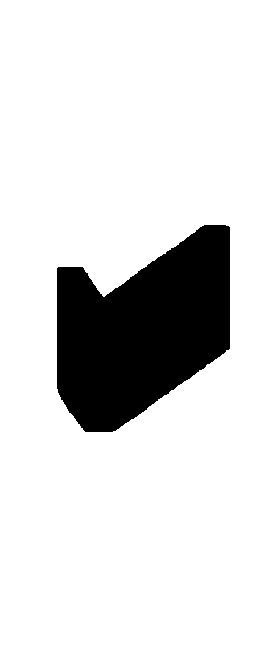

In [ ]:
#erode image
kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
erode=cv2.erode(img,kernal,iterations=10)
cv2_imshow(erode)

In [ ]:
#collecting the required contours in cnt_new
cnts,_=cv2.findContours(erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt_new=[]

for num in range(len(cnts)):
  if(cv2.contourArea(cnts[num])>2000):
    cnt_new.append(cnts[num])

print(len(cnt_new))

2


In [ ]:
#appending all the contour values in x and y matrix which updates from beginning after every iteration
#then we have appended values in matrices xi,yi,xf,yf where xi is minimum x value of contour points and xf is maximum x value of contour points
#and same for yi and yf as well
#cv2.drawContours(erode, cnts[0][2], -1, (150, 100, 255), 10)
xi=[]
xf=[]
yi=[]
yf=[]
for num in range(len(cnt_new)):
  x=[]
  for i in range(len(cnt_new[num])):
    b=cnt_new[num][i][0][0]
    x.append(b)
  #print(x)
  y=[]
  for i in range(len(cnt_new[num])):
    b=cnt_new[num][i][0][1]
    y.append(b)

  #print(cnt_new[num].shape)

  y=np.array(y)
  x=np.array(x)
  y_=min(y)
  y_h=max(y)
  x_=min(x)
  x_h=max(x)
  xi.append(x_)
  yi.append(y_)
  xf.append(x_h)
  yf.append(y_h)
  #print(x_,y_,x_h,y_h)

In [ ]:
#swapping vales of coordinates on the basis of xi to get required order of images
for i in range(len(cnt_new)):
  for j in range(i):
    if(xi[i]<xi[j]):
      temp=xi[i]
      xi[i]=xi[j]
      xi[j]=temp
      temp=xf[i]
      xf[i]=xf[j]
      xf[j]=temp
      temp=yi[i]
      yi[i]=yi[j]
      yi[j]=temp
      temp=yf[i]
      yf[i]=yf[j]
      yf[j]=temp

print(xi,xf,yi,yf)
print(len(cnt_new))

[0, 56] [274, 230] [0, 224] [650, 432]
2


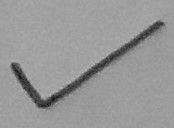

In [ ]:
#appending images in parts on the basis of the swapped order above
parts=[]
for i in range(len(cnt_new)-1):
  cropped_image = image[yi[i+1]-160:yf[i+1]-240,xi[i+1]:xf[i+1]]
  cv2_imshow(cropped_image)
  parts.append(cropped_image)

In [ ]:
parts_new=[]
img_data=[]
for i in range(len(cnt_new)-1):

  #_,thresh= cv2.threshold(parts[i],150, 255, cv2.THRESH_BINARY)
  kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
  erode=cv2.erode(parts[i],kernal,iterations=1)
  image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
  #image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
  #image = cv2.flip(image,0)
  parts_new.append(image)
  image=np.array(image)
  image = image.astype('float32')
  img_data.append(image)

  cv2_imshow(image)

img_data = np.array(img_data)
img_data[img_data>100] = 255
img_data[img_data<=100] = 0

In [ ]:
image=img_data[0]

In [ ]:
image=image.reshape(28,28,1)

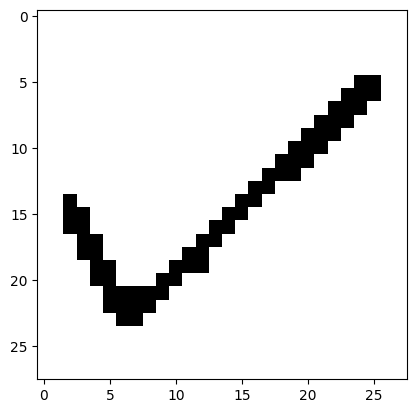

In [ ]:
plt.imshow(image,cmap = 'gray')

In [ ]:
img_data=(255-img_data)/255

In [ ]:
y = np.expand_dims(img_data, axis=3)

In [ ]:
import tensorflow as tf

In [ ]:
#test_value=[]
#for i in range(len(cnt_new)):
# x = pd.DataFrame(img_data)
# x.value_counts()
img_data= tf.keras.utils.normalize(img_data,axis=0)
test= model.predict(y)

# test1 = model1.predict(img_data)

# test = np.column_stack((test1,test))
test= np.array(test).astype(np.float32)
test= np.argmax(test,axis = 1)
print(test)
#test_value.append(test)


1/1 [==============================] - 0s 18ms/step
[0]


In [ ]:
result_confidence=np.max(model.predict(y))
print(result_confidence)

1/1 [==============================] - 0s 16ms/step
0.98806316
